In [1]:
import pandas as pd
df=pd.read_csv('game_form.csv')


In [2]:
# make sure each game as only one label
# if there is drop the last the was given
df=df.drop_duplicates(subset=["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"], keep="first")
assert(df.duplicated().sum()==0)

In [3]:
df.head()

,Timestamp,עמישם התצפיתן,שם קבוצה מארחת,שם קבוצה אורחת,תאריך המשחק,שעת המשחק,שם האיצטדיון,זמן הגעה למשחק,זמן המתנה בתור,קללות מחוץ למגרש,...,Unnamed: 61,רמת האלימות.8,אירוע.7,מה סיבת האירוע.5,דקה.8,Unnamed: 66,מספר הכרטיסים הצהובים לקבוצת הבית,מספר הכרטיסים האדומים לקבוצת הבית,מספר הכרטיסים הצהובים לקבוצת המתארחת,מספר הכרטיסים האדומים לקבוצת המתארחת
0,07/09/2017 12:36:42,ספיר מסיקה,ביתר,אשדוד,28/08/2017,00:20:00,NaN,00:00:20,00:00:40,3,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,3,1
1,07/09/2017 18:06:08,סתיו שר שלום,"בית""ר ירושלים",מ.ס. אשדוד,28/08/2017,20:30:00,המושבה,00:40:00,00:05:00,2,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,3,1
2,09/09/2017 19:55:48,ספי,מכבי תל אביב,בני סכנין,09/09/2017,18:00:00,נתניה,18:13:00,00:00:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,4,0
3,10/09/2017 08:06:57,ספיר מסיקה,אשדוד,קרית שמונה,09/09/2017,15:19:00,איצדטיון אשדוד,00:30:00,00:00:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,4,0
4,13/09/2017 11:40:04,סתיו שר שלום,מכבי פתח תקווה,ביתר ירושלים,11/09/2017,00:21:00,המושבה,00:30:00,00:05:00,1,...,NaN,NaN,NaN,NaN,NaN,NaN,4,0,1,1


In [4]:
# geting the metta data on the game
game_meta=df[["שם קבוצה מארחת","שם קבוצה אורחת","תאריך המשחק"]]


In [5]:
# collecting the violence levels 
r=[col for col in df if (col.startswith('רמת האלימות'))]
game_vail=df.loc[:,r]


In [6]:
# fixing the events level to bins to to event level
# mapping to the bin
def bin_map(x):
    if not pd.isnull(x):
        if x<4:
            return 1
        else:
            return 2
    return 0
# mapping all null levels to 0
def value_map(x):
    if pd.isnull(x):
        return 0
    return x

game_vail=game_vail.applymap(value_map)


In [7]:
# get the cards number of both groups
cards=df[['מספר הכרטיסים הצהובים לקבוצת הבית','מספר הכרטיסים האדומים לקבוצת המתארחת','מספר הכרטיסים האדומים לקבוצת הבית','מספר הכרטיסים הצהובים לקבוצת הבית']]


In [8]:
labels_group=pd.DataFrame()
labels_group['sum']=game_vail.sum(axis=1)
labels_group['mean']=game_vail.mean(axis=1)
labels_group['std']=game_vail.std(axis=1)
labels_group['max']=game_vail.max(axis=1)
labels_group.head()

,sum,mean,std,max
0,2.0,0.222222,0.440959,1.0
1,1.0,0.111111,0.333333,1.0
2,3.0,0.333333,0.707107,2.0
3,5.0,0.555556,0.881917,2.0
4,1.0,0.111111,0.333333,1.0


In [9]:
## start working on the groups merge ##
## function that fixing the group name
groups_names=['בני_סכנין','ביתר_ירושלים','מכבי_תל_אביב','מס_אשדוד','הפועל_חיפה','מכבי_פתח_תקווה','קרית_שמונה','הפועל_אשקלון','מכבי_נתניה','בני_יהודה','עכו','באר_שבע','רעננה','מכבי_חיפה','נס_ציונה','רמת_גן' ,'נצרת']
def fixer(x):
    if (x in ['בית"ר ירושלים','ביתר ','ביתר ירושלים','בית"ר','בית"ר ','ביתר','בית"ר ירושלים ']):
        return groups_names[1]
    elif (x in ['מכבי תל אביב','מכבי ת"א']):
        return groups_names[2]
    elif (x in ['בני סכנין','בי סכנין','סכנין']):
        return groups_names[0]
    elif (x in ['מ.ס. אשדוד','אשדוד','מ.ס אשדוד','מס אשדוד','מ. ס. אשדוד','מ.ס.ע אשדוד','מ.ס. אשדוד ']):
        return groups_names[3]
    elif (x in ['הפועל חיפה','הפועל חיפה ','הפעול חיפה','פועל חיפה']):
        return groups_names[4]
    elif (x in ['מכבי פתח תקווה','מכבי פ"ת','מכבח פתח תקווה','מכבי פתח','מכבי  פתח תקווה','פתח תקווה','מכבי פתח תקוה','מכבי פ.ת.','מכבי פ.ת', 'מכבי פ.ת. ']):
        return groups_names[5]
    elif (x in ['קרית שמונה','הפועל קריית שמונה','עירוני קריית שמונה','עירוני קרית שמונה','הפועל קרית שמונה','עירוני ק"ש ','הפועל ק"ש','עירוני ק"ש','קריית שמונה']):
        return groups_names[6]
    elif (x in ['הפועל אשקלון','אשקלון ']):
        return groups_names[7]
    elif (x in ['מכבי נתניה','מכבי נתניה ','נתניה']):
        return groups_names[8]
    elif (x in ['בני יהודה תל אביב','בני יהודה','בני יהודה ת"א']):
        return groups_names[9]
    elif (x in ['הפועל עכו','עכו','הפועל עכן']):
        return groups_names[10]
    elif (x in ['באר שבע','הפועל באר שבע','הפועל ב"ש','הפועל ב"ש ']):
        return groups_names[11]
    elif (x in ['הפועל רעננה']):
        return groups_names[12]
    elif (x in ['מכבי חיפה ','מכבי חיפה']):
        return groups_names[13]
    return x

game_meta=game_meta.applymap(fixer)
#all name of groups
groups_value_in_label=pd.unique(game_meta[['שם קבוצה אורחת','שם קבוצה מארחת']].values.ravel())


In [10]:
# merge the labels with there games 
mergde_data=pd.merge(game_meta,labels_group , right_index=True, left_index=True)
merge_val=pd.merge(game_meta,game_vail,right_index=True, left_index=True)


In [11]:
# games without events
mergde_data.loc[mergde_data['max']==0]

,שם קבוצה מארחת,שם קבוצה אורחת,תאריך המשחק,sum,mean,std,max
6,ביתר_ירושלים,קרית_שמונה,25/09/2017,0.0,0.0,0.0,0.0
32,מכבי_נתניה,רעננה,30/12/2017,0.0,0.0,0.0,0.0
71,מכבי_נתניה,מכבי_תל_אביב,04/03/2018,0.0,0.0,0.0,0.0


In [12]:
#loading all the execel file
from os import listdir,path

mypath='facebook_set/'
dataframes=[]
for filename in listdir(mypath):
    if  'xlsx' in filename:
        current=pd.read_excel(path.join(mypath,filename))
        dataframes.append(current)
        print("loading: "+str(path.join(mypath,filename))+" with size= "+str(current.shape))
    
ecxels= pd.concat(dataframes)
print ("Total size is= "+str(ecxels['מועד המשחק'].count()))
ecxels=ecxels.drop('Unnamed: 68',axis=1)

loading: facebook_set/hifa.xlsx with size= (36, 101)
loading: facebook_set/ranana.xlsx with size= (33, 101)
loading: facebook_set/מכבי חיפה ליגת העל.xlsx with size= (33, 101)
loading: facebook_set/משחקים של ביתר.xlsx with size= (37, 101)
loading: facebook_set/עותק של פתח תקווה כדורגל -.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים בני סכנין.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים הפועל אשקלון.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מ.ס. אשדוד.xlsx with size= (33, 101)
loading: facebook_set/קובץ נתונים מכבי נתניה.xlsx with size= (36, 101)
loading: facebook_set/קובץ ריכוז נתונים - מכבי תל אביב עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים בני יהודה עונה 17-18.xlsx with size= (36, 100)
loading: facebook_set/קובץ ריכוז נתונים הפועל עכו עונה 17 18.xlsx with size= (32, 100)
loading: facebook_set/קובץ ריכוז נתונים- קרית שמונה כדורגל.xlsx with size= (33, 101)
loading: facebook_set/ריכוז נתונים הפועל באר שבע 17

In [13]:
# fixing all the teams name
ecxels[['מארחת','אורחת']]=ecxels[['מארחת','אורחת']].applymap(fixer)


In [14]:
# removeing groups that aren't in this leage
groups_value_in_data=pd.unique(ecxels[['מארחת','אורחת']].values.ravel())
remove=[item for item in groups_value_in_data if item not in groups_value_in_label]
print("groups not in this track = "+str(remove))
ecxels=ecxels[~ecxels['מארחת'].isin(remove)]
ecxels=ecxels[~ecxels['אורחת'].isin(remove)]

groups not in this track = ['הפועל פ"ת', 'מאריבור', 'לוגאנו', 'ויקטוריה פלזן', 'סטיאווה בוקרשט', 'אחי נצרת', 'הפועל רמת גן']


In [15]:
# fixing dates
ecxels['מועד המשחק']=pd.to_datetime(ecxels['מועד המשחק'],format='%d-%m-%Y')
mergde_data['תאריך המשחק']=pd.to_datetime(mergde_data['תאריך המשחק'],format='%d/%m/%Y')
merge_val['תאריך המשחק']=pd.to_datetime(mergde_data['תאריך המשחק'],format='%d/%m/%Y')
# checking the size sample
assert(ecxels['מועד המשחק'].count()>mergde_data['תאריך המשחק'].count())

#fixing col names to be the same
mergde_data.rename({'תאריך המשחק': 'מועד המשחק','שם קבוצה אורחת': 'אורחת', 'שם קבוצה מארחת': 'מארחת'}, axis='columns',inplace=True)
merge_val.rename({'תאריך המשחק': 'מועד המשחק','שם קבוצה אורחת': 'אורחת', 'שם קבוצה מארחת': 'מארחת'}, axis='columns',inplace=True)



In [16]:
# if two rows cover the same game, join them the one
ecxels=pd.merge(ecxels, ecxels, on=['אורחת','מארחת','מועד המשחק']).drop_duplicates(subset=['אורחת','מארחת','מועד המשחק'],keep="first")

In [17]:
# merging
facebok_and_label=pd.merge(ecxels,mergde_data,how='right',on=['אורחת','מארחת','מועד המשחק'])
facebok_with_pure_val=pd.merge(ecxels,merge_val,how='right',on=['אורחת','מארחת','מועד המשחק'])

#print(facebok_and_label.shape)
print("number of samples= "+str(facebok_and_label['מארחת'].count()))


number of samples= 83


In [18]:
# thats games without vectors, but with labels
left=facebok_and_label.loc[facebok_and_label.isnull().any(axis=1)][['מארחת','אורחת','מועד המשחק']]
left.head()



,מארחת,אורחת,מועד המשחק
39,באר_שבע,ביתר_ירושלים,2018-02-25
40,ביתר_ירושלים,עכו,2018-03-04
41,רעננה,ביתר_ירושלים,2018-03-11
42,ביתר_ירושלים,מכבי_נתניה,2018-03-17
43,ביתר_ירושלים,בני_יהודה,2018-04-08


In [19]:
final_df=pd.merge(ecxels,mergde_data,how='inner',on=['אורחת','מארחת','מועד המשחק'])
pure_final_df=pd.merge(ecxels,merge_val,how='inner',on=['אורחת','מארחת','מועד המשחק'])

# find all indexs with nan
containNaN=final_df[final_df.isnull().any(axis=1)]
# find all columns that have nan in them and present them to with the meta-data
containNaN[containNaN.columns[containNaN.isna().any()].tolist()+['אורחת','מארחת','מועד המשחק']]

,כמות לייקים לביטויי אלימות מילולית 0-24 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 130-154 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 154-178 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 24-48 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 3 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 48-72 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 72-96 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית. 96-130 שעות לפני המשחק_x,כמות לייקים לביטויי אלימות מילולית 0-24 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 130-154 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 154-178 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 24-48 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 3 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 48-72 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 72-96 שעות לפני המשחק_y,כמות לייקים לביטויי אלימות מילולית. 96-130 שעות לפני המשחק_y,אורחת,מארחת,מועד המשחק
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ביתר_ירושלים,באר_שבע,2018-02-25
40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,עכו,ביתר_ירושלים,2018-03-04
41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ביתר_ירושלים,רעננה,2018-03-11
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,מכבי_נתניה,ביתר_ירושלים,2018-03-17
43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,בני_יהודה,ביתר_ירושלים,2018-04-08
44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,מכבי_תל_אביב,ביתר_ירושלים,2018-04-16
45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ביתר_ירושלים,מכבי_נתניה,2018-04-30
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,באר_שבע,ביתר_ירושלים,2018-05-05
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,הפועל_חיפה,ביתר_ירושלים,2018-05-09
48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ביתר_ירושלים,מכבי_תל_אביב,2018-05-15


In [20]:
# remove meta-data


In [21]:
import numpy as np
# remove all nan, and check this
final_df=final_df.dropna(axis=1,how='any')
pure_final_df_copy=final_df.copy()
pure_final_df=pure_final_df.dropna(axis=1,how='any')
droped =  pure_final_df_copy[np.invert(pure_final_df_copy.index.isin(final_df.index))]

#V.drop(index=only_na)
assert(final_df.isna().sum().sum()==0)


In [22]:
# find vlaues 
#nan_numbric=final_df[final_df.isin(['אפס']).any(axis=1)]
#nan_numbric[nan_numbric.columns[nan_numbric.isin(['אפס']).any()].tolist()+['אורחת','מארחת','מועד המשחק']]



In [23]:
# SORT AND THEN DROP non numric values
pure_final_df=pure_final_df.sort_values(by='מועד המשחק') 
pure_final_df=pure_final_df._get_numeric_data()


In [24]:
# SORT AND THEN DROP non numric values
final_df=final_df.sort_values(by='מועד המשחק') 
final_df_copy=final_df.copy()
final_df=final_df._get_numeric_data()
final_df.head()

,כמות ביטויי אלימות מילולית. 0-24 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 130- 154 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 154-178 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 24-48 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 3 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 48-72 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 72-96 שעות לפני המשחק_x,כמות ביטויי אלימות מילולית. 96-130 שעות לפני המשחק_x,כמות ביטויי דרמטיזציה. 0-24 שעות לפני המשחק_x,כמות ביטויי דרמטיזציה. 130-154 שעות לפני המשחק_x,...,כמות לייקים לרגשות שליליים. 154-178 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 24-48 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 3 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 48-72 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 72-96 שעות לפני המשחק_y,כמות לייקים לרגשות שליליים. 96-130 שעות לפני המשחק_y,sum,mean,std,max
27,18,21,3,0,1.0,8,2,1,44,42,...,6,0,0.0,0,0,0,1.0,0.111111,0.333333,1.0
26,18,21,3,0,1.0,8,2,1,44,42,...,6,0,0.0,0,0,0,2.0,0.222222,0.440959,1.0
58,1,0,0,2,0.0,0,0,0,4,0,...,0,0,0.0,0,0,0,3.0,0.333333,0.707107,2.0
62,2,1,0,2,3.0,0,0,0,8,5,...,0,0,2.0,0,1,0,5.0,0.555556,0.881917,2.0
28,12,3,14,1,2.0,0,5,1,53,10,...,95,0,0.0,0,5,0,1.0,0.111111,0.333333,1.0


In [25]:
# getting for each game the violance events level and the number of tickets
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
V=pd.merge(cards,game_vail,right_index=True, left_index=True)
#V.head(10)

In [26]:
cards.shape

(83, 4)

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# need to look on the elbow
dis={}
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    cluster_labels = kmeans.fit(V)
    dis[i]=cluster_labels.inertia_
plt.figure()
plt.plot(list(dis.keys()), list(dis.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

# the plot indicate 3 clusters

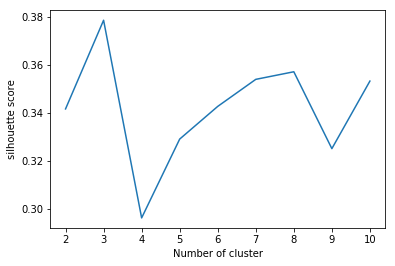

In [28]:
#https://stackoverflow.com/questions/19197715/scikit-learn-k-means-elbow-criterion
# need to look on the peak
sil_coeff={}
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(V)
    label = kmeans.labels_
    sil_coeff[n_cluster] = silhouette_score(V, label, metric='euclidean')
plt.figure()
plt.plot(list(sil_coeff.keys()), list(sil_coeff.values()))
plt.xlabel("Number of cluster")
plt.ylabel("silhouette score")
plt.show()
# the plot indicate 3 clusters


In [29]:
#so, we need to choose between 3 and 5 clusters
# we will draw them both and decaid


# acording to the elbow method and the silhouette score
kmeans3= KMeans(n_clusters=3).fit_predict(V)
# acording to the number of class we deceide
kmeans6 = KMeans(n_clusters=6).fit_predict(V)





In [30]:
# build the vectors that will be the pradicating features
X=final_df.drop(['max', 'mean','std','sum'], axis=1)
print("number of samples are= "+str(X.shape[0]) +" with number of features= "+str(X.shape[1]))

number of samples are= 78 with number of features= 176


In [31]:
# pca to draw the data 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
clf=pca.fit(X)
pca_data=clf.fit_transform(X)


ValueError: c of shape (83,) not acceptable as a color sequence for x with size 78, y with size 78

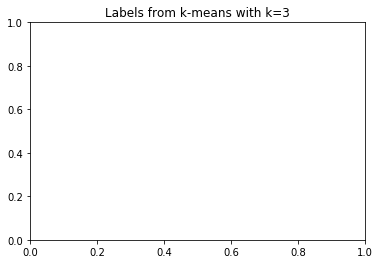

In [32]:
# for 6 clusters
plt.figure(1)
plt.title('Labels from k-means with k=3')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans3,
            s=50, cmap='viridis');
cb = plt.colorbar()
plt.figure(2)

plt.title('Labels from k-means with k=6')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans6,
            s=50, cmap='viridis');
cb = plt.colorbar()

plt.figure(3)
plt.title('Labels from our-function')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_df['max'],
            s=50, cmap='viridis');
cb = plt.colorbar()


In [ ]:
# write to csv the cluster selection
clusters_compare=pd.concat([final_df_copy,pd.DataFrame(data=kmeans3,columns=['kmeans3']),pd.DataFrame(data=kmeans5,columns=['kmeans5']),pd.DataFrame(data=kmeans6,columns=['kmeans6'])],axis=1)
clusters_compare.head()
clusters_compare.to_csv(encoding='utf-8',path_or_buf='clusters.csv')

In [ ]:

from  sklearn.mixture import GaussianMixture
# for 5 clusters
labels = GaussianMixture(n_components=3).fit(X).predict(X)
plt.figure(1)
plt.title('Labels from GaussianMixture with k=3')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels,
            s=50, cmap='viridis');
cb = plt.colorbar()


plt.figure(2)
plt.title('Labels from our-function')
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_df['max'],
            s=50, cmap='viridis');
cb = plt.colorbar()


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
# BUILD THE FUNCTION THAT DO 5 FOLEDS AS AMIT ASKED
# this function don't fit regression, build a new function to regression
def split_by_label(X,Y,the_test_size):
    X_train_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    X_test_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_train_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_test_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]

    X['label']=Y
    classes=X['label'].unique()
   # print(classes)
    fold_inedx=0
    for clas in classes:
        all_samples=X[X['label']==clas]
        for i in range(5):
            X_train, X_test, y_train, y_test = train_test_split(all_samples,pd.DataFrame([clas]*len(all_samples),columns=['label']),test_size=the_test_size,shuffle=True)
            X_train_folds[i]=pd.concat([X_train,X_train_folds[i]])
            X_test_folds[i]=pd.concat([X_test,X_test_folds[i]]) 
            Y_train_folds[i]=pd.concat([y_train,Y_train_folds[i]])  
            Y_test_folds[i]=pd.concat([y_test,Y_test_folds[i]]) 
            
    return X_train_folds,X_test_folds,Y_train_folds,Y_test_folds

from sklearn.model_selection import KFold

def split_5_fold(X,Y,the_test_size):
    _X=X.values
    X_train_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    X_test_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_train_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    Y_test_folds=[pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()]
    kf = KFold(n_splits=5)
    sum = 0
    i=0
   # print(_X.shape)
    for train_indexs, test_indexs in kf.split(_X):
           # print(test_indexs)
            X_train_folds[i]=pd.DataFrame(_X[train_indexs])
            X_test_folds[i]=pd.DataFrame(_X[test_indexs]) 
            Y_train_folds[i]=pd.DataFrame(Y[train_indexs])  
            Y_test_folds[i]=pd.DataFrame(Y[test_indexs]) 
            i=i+1
    return X_train_folds,X_test_folds,Y_train_folds,Y_test_folds

    
def five_fold_avg_classifction(clf,X,Y,test_size,scoring_function=(lambda clf,x,y:clf.score(x, y))):
    X_train_folds,X_test_folds,Y_train_folds,Y_test_folds=split_by_label(X, Y,the_test_size=test_size)
    socre_values=[]
    fp_values=[]
    for  X_train, X_test, y_train, y_test in zip(X_train_folds,X_test_folds,Y_train_folds,Y_test_folds):
        clf=clf.fit(X_train, y_train.values.ravel()) 
        SVC_score=scoring_function(clf,X_test,y_test)
        socre_values.append(SVC_score)
        cm1 = confusion_matrix(clf.predict(X_test).ravel(), y_test)
        FalsePositive = []
        for i in range(len(X['label'].unique())):
            FalsePositive.append(sum(cm1[:,i]) - cm1[i,i])
        fp_values.append(FalsePositive)
    return np.average(socre_values),np.average(fp_values, axis=0).ravel(),clf

def five_fold_avg_regresion(clf,X,Y,test_size,scoring_function=(lambda clf,x,y:clf.score(x, y))):
    X_train_folds,X_test_folds,Y_train_folds,Y_test_folds=split_5_fold(X, Y,the_test_size=test_size) # replace it with a proper split
    socre_values=[]
    fp_values=[]
    for  X_train, X_test, y_train, y_test in zip(X_train_folds,X_test_folds,Y_train_folds,Y_test_folds):
        #print( y_train.values.shape)
        #print( X_train.values.shape)

        clf=clf.fit(X_train, y_train.values) 
        SVC_score=scoring_function(clf,X_test,y_test)
        socre_values.append(SVC_score)
    return np.average(socre_values)

from sklearn.metrics import r2_score

def custem_score(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.around(y_pred)
    return r2_score(y, y_pred)

def custem_score_ceil(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.ceil(y_pred)
    return r2_score(y, y_pred)
    
def custem_score_floor(clf,x,y):
    y_pred=clf.predict(x)
    y_pred=np.floor(y_pred)
    return r2_score(y, y_pred)
    


In [ ]:
# count the size of the class
def class_size(Y):
    unique, counts = np.unique(Y, return_counts=True)
    return dict(zip(unique, counts))


In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
def regression_estimation(X,Y,multi=False):
    Y = np.array(Y).astype(int)
    #print(Y)
    print("---------- regression---------")
    #SVR USING DEEFRENT scoring function
    socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33)
    closest_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X,Y, test_size=0.33,scoring_function=custem_score)
    ceil_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33,scoring_function=custem_score_ceil)
    floor_socre=five_fold_avg_regresion(MultiOutputRegressor(svm.SVR(kernel='rbf')) if multi else svm.SVR(kernel='rbf'),X, Y, test_size=0.33,scoring_function=custem_score_floor)
    print("svr- avg score with normal rmse = "+str(socre))
    print("svr- avg score with round the closest = "+str(closest_socre))
    print("svr- avg score with ceil  = "+str(ceil_socre))
    print("svr- avg score with floor = "+str(closest_socre))
    # RANDOM FORAST REGRSSTION
    socre=five_fold_avg_regresion(RandomForestRegressor(max_depth=10, random_state=0),X, Y.ravel(), test_size=0.33)
    print("random forest - avg score with normal rmse = "+str(socre))
    print("------------------------------")


In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

def classification_estimation(X,Y):
    Y = np.array(Y).astype(int)
    print("----------classification------")
    custems_score=(lambda clf,x,y: c)
    socre,fp,clf=five_fold_avg_classifction(svm.SVC(decision_function_shape='ovo',class_weight='balanced'),X, Y, test_size=0.33)
    print("svc - avg score is= "+str(socre))
    socre,fp,clf=five_fold_avg_classifction(RandomForestClassifier(max_depth=5, random_state=0),X, Y, test_size=0.33)
    print("RandomForest - avg score is= "+str(socre))
    l=np.arange(len(X['label'].unique()))

    
    print("------------------------------")
    pred_class=class_size(clf.predict(X))
    true_class=class_size(Y)
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, 1)
    # Plot
    plt.pie(true_class.values(), labels=true_class.keys(),
        autopct='%1.1f%%', shadow=True, startangle=140)

    plt.axis('equal')
    plt.title('true class')
    plt.subplot(1, 3, 2)
    # Plot
    plt.pie(pred_class.values(), labels=pred_class.keys(),
        autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.axis('equal')
    plt.title('pred class')
    plt.show()
    plt.figure(figsize=(20,10))
    plt.subplot(1, 3, 3)
    plt.pie(fp, labels=l,
        autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.axis('equal')
    plt.title('flase positive count')
    plt.show()


In [ ]:
#calssifaction, using the labels from the clustering with 5 clusters 
classification_estimation(X, kmeans5)
regression_estimation(X, kmeans5)

In [ ]:
regression_estimation(X,final_df[['max', 'mean','std','sum']],multi=True)
#print(final_df[['max', 'mean','std','sum']].shape)
#X.shape

In [ ]:
# using the labels from the clustering with 3 clusters
classification_estimation(X, kmeans3)
regression_estimation(X, kmeans3)

In [ ]:
# second task with out label function
# using the labels from the clustering with 5 clusters
classification_estimation(X, final_df['max'])
regression_estimation(X, final_df['max'])

In [ ]:
regression_estimation(X,final_df['sum'])
classification_estimation(X,final_df['sum'])

In [ ]:
regression_estimation(X,final_df['mean'])
classification_estimation(X,final_df['mean'].map(lambda x: x*10))
#final_df['mean'].values

In [ ]:
regression_estimation(pure_final_df.loc[:,~pure_final_df.columns.isin(r)],pure_final_df.loc[:,r],multi=True)
